In [1]:
!pip install qiskit
!pip install seaborn
!pip install scipy==1.4.1

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\gueha\anaconda3\envs\quantum\python.exe' 'C:\Users\gueha\AppData\Local\Temp\pip-standalone-pip-gvier4rl\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\gueha\AppData\Local\Temp\pip-build-env-yvfn2k0t\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='


  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries f77blas,cblas,atlas not found in C:\Users\gueha\anaconda3\envs\quantum\lib
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries f77blas,cblas,atlas not found in C:\
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\Users\gueha\anaconda3\envs\quantum\libs
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries f77blas,cblas,atlas not found in C:\Users\gueha\anaconda3\envs\quantum\libs
    No module named 'numpy.d

# Import data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the data

In [3]:
#%cd speech_quantum_dl
###from google.colab import drive

###drive.mount('/content/drive/', force_remount=True)
###%cd '/content/drive/My Drive/REU/FaultDetection/2022Version'


In [5]:
df = pd.read_csv("asu_solar_dataset.csv")

In [6]:
df.head()

,DCArrayOutput_W_,Vmp,Imp,CellTemperature_C_,PlaneOfArrayIrradiance_W_m_2_,Fill Factor,Gamma,Pmp,Voc,Isc,Degraded,Shaded,Soiled,SC,STC
0,4715.409,36.331723,1.369981,16.107,281.111,4.669695,0.177061,49.773762,44.338856,5.242090,0,0,0,0,1
1,9076.926,37.436438,2.559325,26.713,527.216,2.391698,0.181732,95.811997,44.023777,5.205219,0,0,0,0,1
2,11978.364,35.924148,3.519590,36.542,712.905,1.913899,0.177356,126.438287,45.239121,5.349134,0,0,0,0,1
3,13606.691,35.296861,4.069092,40.619,820.486,1.637532,0.175050,143.626183,44.804407,5.249316,0,0,0,0,1
4,13953.936,34.555717,4.262436,45.436,861.077,1.629109,0.171055,147.291547,44.492927,5.393082,0,0,0,0,1


# Preprocess

In [7]:
Fault = "STC"

In [8]:
# map between integer label and categorical target

cat_map = dict(zip(df[Fault].astype("category").cat.codes, df[Fault]))
print("\nTarget integer-label encoding:", cat_map, "\n\n")

# categorical target --> integer label

df[Fault] = df[Fault].astype("category").cat.codes

#################################################################################

# taking only species 1 and 0 -- binary classification

df = df[df[Fault].isin([0, 1])]

#################################################################################

df.info()


Target integer-label encoding: {1: 1, 0: 0} 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21485 entries, 0 to 21484
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DCArrayOutput_W_               21485 non-null  float64
 1   Vmp                            21485 non-null  float64
 2   Imp                            21485 non-null  float64
 3   CellTemperature_C_             21485 non-null  float64
 4   PlaneOfArrayIrradiance_W_m_2_  21485 non-null  float64
 5   Fill Factor                    21485 non-null  float64
 6   Gamma                          21485 non-null  float64
 7   Pmp                            21485 non-null  float64
 8   Voc                            21485 non-null  float64
 9   Isc                            21485 non-null  float64
 10  Degraded                       21485 non-null  int64  
 11  Shaded                         21485 non-null  int64  
 12

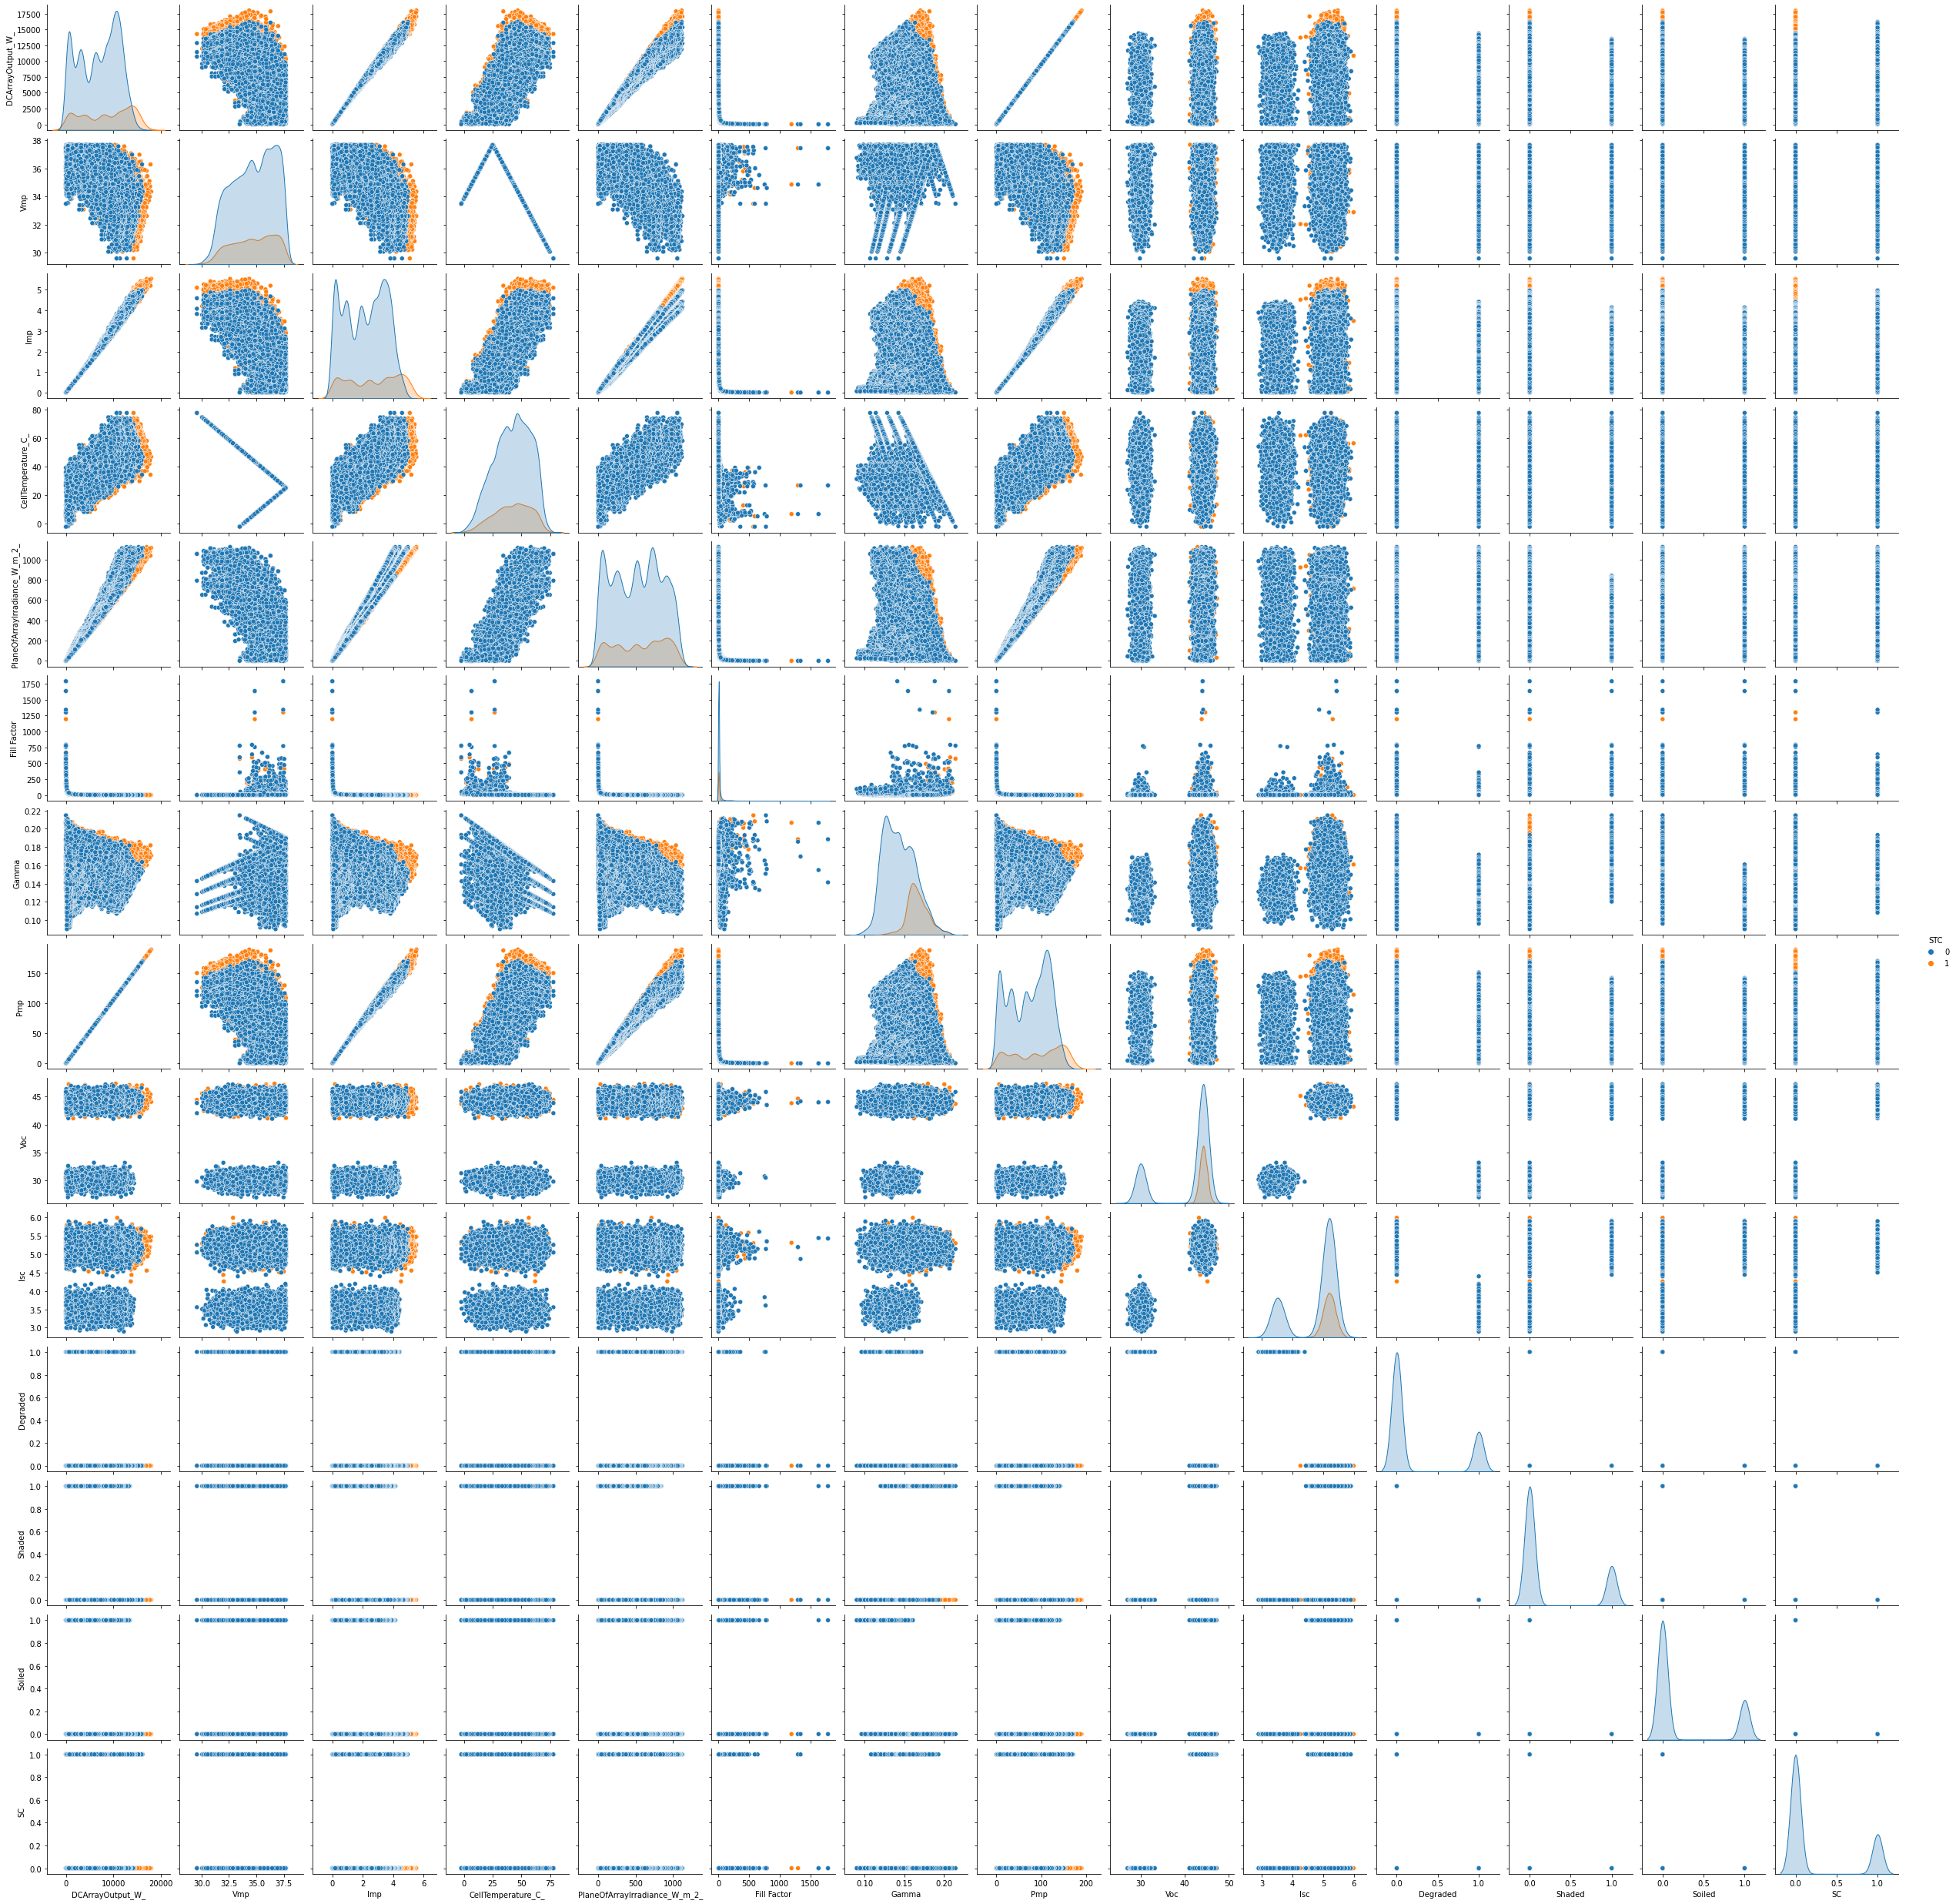

In [41]:
sns.pairplot(df, hue=Fault)

In [10]:
# features
X = df.drop(["Degraded", "Shaded", "Soiled", "SC", "STC"], axis = 1)

# target
y = df[Fault]

In [11]:
# train-test split, 20% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Classical classification

In [12]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=42).fit(X, y)

y_pred = logit.predict(X_test)

#################################################################################

from sklearn.metrics import classification_report, confusion_matrix

print("Classical classifier (Logistic Regression):\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classical classifier (Logistic Regression):

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3438
           1       0.58      0.37      0.45       859

    accuracy                           0.82      4297
   macro avg       0.72      0.65      0.67      4297
weighted avg       0.80      0.82      0.80      4297

[[3206  232]
 [ 543  316]]


# Variational Circuit

## VQC

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

Variational Quantum Classifier

In [14]:
# we'll encode each feature in a single qubit. Thus, that's the number of qubits

N = X.shape[1]

Initial State

In [15]:
# let's start with N quantum register and 1 single classical register (for measurement readout)

qr = QuantumRegister(N, "q")
cr = ClassicalRegister(1, "c")

qc = QuantumCircuit(qr, cr)

print("\nInitial Circuit:\n")

qc.draw()


Initial Circuit:



q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     
q_7: 
     
q_8: 
     
q_9: 
     
c: 1/

Feature Map




In [16]:
# selecting one single observation

k = 0
obs_k = X_train.iloc[k]

In [17]:
obs_k

DCArrayOutput_W_                 6225.706000
Vmp                                35.804445
Imp                                 1.835409
CellTemperature_C_                 37.320000
PlaneOfArrayIrradiance_W_m_2_     381.728250
Fill Factor                         3.392501
Gamma                               0.172153
Pmp                                65.715786
Voc                                43.108491
Isc                                 5.171623
Name: 18483, dtype: float64

In [18]:
for i, phi_ik in enumerate(obs_k):
    
    qc.rx(phi_ik, i)
    
qc.draw()

┌────────────┐
q_0: ─┤ Rx(6225.7) ├
      ├────────────┤
q_1: ─┤ Rx(35.804) ├
      ├────────────┤
q_2: ─┤ Rx(1.8354) ├
      ├───────────┬┘
q_3: ─┤ Rx(37.32) ├─
      ├───────────┴┐
q_4: ─┤ Rx(381.73) ├
      ├────────────┤
q_5: ─┤ Rx(3.3925) ├
     ┌┴────────────┤
q_6: ┤ Rx(0.17215) ├
     └┬────────────┤
q_7: ─┤ Rx(65.716) ├
      ├────────────┤
q_8: ─┤ Rx(43.108) ├
      ├────────────┤
q_9: ─┤ Rx(5.1716) ├
      └────────────┘
c: 1/═══════════════

Variational Layer

In [19]:
# CNOTs to induce entanglement

for i in range(N-1):
    
    qc.cnot(i, i+1)
    
qc.draw()

┌────────────┐                                             
q_0: ─┤ Rx(6225.7) ├──■──────────────────────────────────────────
      ├────────────┤┌─┴─┐                                        
q_1: ─┤ Rx(35.804) ├┤ X ├──■─────────────────────────────────────
      ├────────────┤└───┘┌─┴─┐                                   
q_2: ─┤ Rx(1.8354) ├─────┤ X ├──■────────────────────────────────
      ├───────────┬┘     └───┘┌─┴─┐                              
q_3: ─┤ Rx(37.32) ├───────────┤ X ├──■───────────────────────────
      ├───────────┴┐          └───┘┌─┴─┐                         
q_4: ─┤ Rx(381.73) ├───────────────┤ X ├──■──────────────────────
      ├────────────┤               └───┘┌─┴─┐                    
q_5: ─┤ Rx(3.3925) ├────────────────────┤ X ├──■─────────────────
     ┌┴────────────┤                    └───┘┌─┴─┐               
q_6: ┤ Rx(0.17215) ├─────────────────────────┤ X ├──■────────────
     └┬────────────┤                         └───┘┌─┴─┐          
q_7: ─┤ Rx(65.716) ├──────────────────────────────┤ X ├──■───────
      ├────────────┤                              └───┘┌─┴─┐     
q_8: ─┤ Rx(43.108) ├───────────────────────────────────┤ X ├──■──
      ├────────────┤                                   └───┘┌─┴─┐
q_9: ─┤ Rx(5.1716) ├────────────────────────────────────────┤ X ├
      └────────────┘                                        └───┘
c: 1/════════════════════════════════════════════════════════════

In [20]:
# CNOT, targeted on the first register

qc.cnot(N-1, 0)

qc.draw()

┌────────────┐                                             ┌───┐
q_0: ─┤ Rx(6225.7) ├──■──────────────────────────────────────────┤ X ├
      ├────────────┤┌─┴─┐                                        └─┬─┘
q_1: ─┤ Rx(35.804) ├┤ X ├──■───────────────────────────────────────┼──
      ├────────────┤└───┘┌─┴─┐                                     │  
q_2: ─┤ Rx(1.8354) ├─────┤ X ├──■──────────────────────────────────┼──
      ├───────────┬┘     └───┘┌─┴─┐                                │  
q_3: ─┤ Rx(37.32) ├───────────┤ X ├──■─────────────────────────────┼──
      ├───────────┴┐          └───┘┌─┴─┐                           │  
q_4: ─┤ Rx(381.73) ├───────────────┤ X ├──■────────────────────────┼──
      ├────────────┤               └───┘┌─┴─┐                      │  
q_5: ─┤ Rx(3.3925) ├────────────────────┤ X ├──■───────────────────┼──
     ┌┴────────────┤                    └───┘┌─┴─┐                 │  
q_6: ┤ Rx(0.17215) ├─────────────────────────┤ X ├──■──────────────┼──
     └┬────────────┤                         └───┘┌─┴─┐            │  
q_7: ─┤ Rx(65.716) ├──────────────────────────────┤ X ├──■─────────┼──
      ├────────────┤                              └───┘┌─┴─┐       │  
q_8: ─┤ Rx(43.108) ├───────────────────────────────────┤ X ├──■────┼──
      ├────────────┤                                   └───┘┌─┴─┐  │  
q_9: ─┤ Rx(5.1716) ├────────────────────────────────────────┤ X ├──■──
      └────────────┘                                        └───┘     
c: 1/═════════════════════════════════════════════════════════════════

In [21]:
# parameterized rotations

# first, let's introduce a vector of (random) parameters. 
# that's the parameter vector \vec{\theta}

np.random.seed(42)
theta = np.random.uniform(0, 1, N)

for i in range(N):
    
    qc.ry(theta[i], i)
    
qc.draw()

┌────────────┐                                                       »
q_0: ─┤ Rx(6225.7) ├──■────────────────────────────────────────────────────»
      ├────────────┤┌─┴─┐     ┌─────────────┐                              »
q_1: ─┤ Rx(35.804) ├┤ X ├──■──┤ Ry(0.95071) ├──────────────────────────────»
      ├────────────┤└───┘┌─┴─┐└─────────────┘┌─────────────┐               »
q_2: ─┤ Rx(1.8354) ├─────┤ X ├───────■───────┤ Ry(0.73199) ├───────────────»
      ├───────────┬┘     └───┘     ┌─┴─┐     └─────────────┘┌─────────────┐»
q_3: ─┤ Rx(37.32) ├────────────────┤ X ├────────────■───────┤ Ry(0.59866) ├»
      ├───────────┴┐               └───┘          ┌─┴─┐     └─────────────┘»
q_4: ─┤ Rx(381.73) ├──────────────────────────────┤ X ├────────────■───────»
      ├────────────┤                              └───┘          ┌─┴─┐     »
q_5: ─┤ Rx(3.3925) ├─────────────────────────────────────────────┤ X ├─────»
     ┌┴────────────┤                                             └───┘     »
q_6: ┤ Rx(0.17215) ├───────────────────────────────────────────────────────»
     └┬────────────┤                                                       »
q_7: ─┤ Rx(65.716) ├───────────────────────────────────────────────────────»
      ├────────────┤                                                       »
q_8: ─┤ Rx(43.108) ├───────────────────────────────────────────────────────»
      ├────────────┤                                                       »
q_9: ─┤ Rx(5.1716) ├───────────────────────────────────────────────────────»
      └────────────┘                                                       »
c: 1/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                  ┌───┐»
«q_0: ─────────────────────────────────────────────────────────────┤ X ├»
«                                                                  └─┬─┘»
«q_1: ───────────────────────────────────────────────────────────────┼──»
«                                                                    │  »
«q_2: ───────────────────────────────────────────────────────────────┼──»
«                                                                    │  »
«q_3: ───────────────────────────────────────────────────────────────┼──»
«     ┌─────────────┐                                                │  »
«q_4: ┤ Ry(0.15602) ├────────────────────────────────────────────────┼──»
«     └─────────────┘┌─────────────┐                                 │  »
«q_5: ───────■───────┤ Ry(0.15599) ├─────────────────────────────────┼──»
«          ┌─┴─┐     └─────────────┘┌──────────────┐                 │  »
«q_6: ─────┤ X ├────────────■───────┤ Ry(0.058084) ├─────────────────┼──»
«          └───┘          ┌─┴─┐     └──────────────┘┌─────────────┐  │  »
«q_7: ────────────────────┤ X ├────────────■────────┤ Ry(0.86618) ├──┼──»
«                         └───┘          ┌─┴─┐      └─────────────┘  │  »
«q_8: ───────────────────────────────────┤ X ├─────────────■─────────┼──»
«                                        └───┘           ┌─┴─┐       │  »
«q_9: ───────────────────────────────────────────────────┤ X ├───────■──»
«                                                        └───┘          »
«c: 1/══════════════════════════════════════════════════════════════════»
«                                                                       »
«     ┌─────────────┐
«q_0: ┤ Ry(0.37454) ├
«     └─────────────┘
«q_1: ───────────────
«                    
«q_2: ───────────────
«                    
«q_3: ───────────────
«                    
«q_4: ───────────────
«                    
«q_5: ───────────────
«                    
«q_6: ───────────────
«                    
«q_7: ───────────────
«     ┌─────────────┐
«q_8: ┤ Ry(0.60112) ├
«     ├─────────────┤
«q_9: ┤ Ry(0.70807) ├
«     └─────────────┘
«c: 1/═══════════════
«

Measurement

In [22]:
# measure the first qubit and put its readout in the classical register

qc.measure(0, cr)

qc.draw()

┌────────────┐                                                       »
q_0: ─┤ Rx(6225.7) ├──■────────────────────────────────────────────────────»
      ├────────────┤┌─┴─┐     ┌─────────────┐                              »
q_1: ─┤ Rx(35.804) ├┤ X ├──■──┤ Ry(0.95071) ├──────────────────────────────»
      ├────────────┤└───┘┌─┴─┐└─────────────┘┌─────────────┐               »
q_2: ─┤ Rx(1.8354) ├─────┤ X ├───────■───────┤ Ry(0.73199) ├───────────────»
      ├───────────┬┘     └───┘     ┌─┴─┐     └─────────────┘┌─────────────┐»
q_3: ─┤ Rx(37.32) ├────────────────┤ X ├────────────■───────┤ Ry(0.59866) ├»
      ├───────────┴┐               └───┘          ┌─┴─┐     └─────────────┘»
q_4: ─┤ Rx(381.73) ├──────────────────────────────┤ X ├────────────■───────»
      ├────────────┤                              └───┘          ┌─┴─┐     »
q_5: ─┤ Rx(3.3925) ├─────────────────────────────────────────────┤ X ├─────»
     ┌┴────────────┤                                             └───┘     »
q_6: ┤ Rx(0.17215) ├───────────────────────────────────────────────────────»
     └┬────────────┤                                                       »
q_7: ─┤ Rx(65.716) ├───────────────────────────────────────────────────────»
      ├────────────┤                                                       »
q_8: ─┤ Rx(43.108) ├───────────────────────────────────────────────────────»
      ├────────────┤                                                       »
q_9: ─┤ Rx(5.1716) ├───────────────────────────────────────────────────────»
      └────────────┘                                                       »
c: 1/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                  ┌───┐»
«q_0: ─────────────────────────────────────────────────────────────┤ X ├»
«                                                                  └─┬─┘»
«q_1: ───────────────────────────────────────────────────────────────┼──»
«                                                                    │  »
«q_2: ───────────────────────────────────────────────────────────────┼──»
«                                                                    │  »
«q_3: ───────────────────────────────────────────────────────────────┼──»
«     ┌─────────────┐                                                │  »
«q_4: ┤ Ry(0.15602) ├────────────────────────────────────────────────┼──»
«     └─────────────┘┌─────────────┐                                 │  »
«q_5: ───────■───────┤ Ry(0.15599) ├─────────────────────────────────┼──»
«          ┌─┴─┐     └─────────────┘┌──────────────┐                 │  »
«q_6: ─────┤ X ├────────────■───────┤ Ry(0.058084) ├─────────────────┼──»
«          └───┘          ┌─┴─┐     └──────────────┘┌─────────────┐  │  »
«q_7: ────────────────────┤ X ├────────────■────────┤ Ry(0.86618) ├──┼──»
«                         └───┘          ┌─┴─┐      └─────────────┘  │  »
«q_8: ───────────────────────────────────┤ X ├─────────────■─────────┼──»
«                                        └───┘           ┌─┴─┐       │  »
«q_9: ───────────────────────────────────────────────────┤ X ├───────■──»
«                                                        └───┘          »
«c: 1/══════════════════════════════════════════════════════════════════»
«                                                                       »
«     ┌─────────────┐┌─┐
«q_0: ┤ Ry(0.37454) ├┤M├
«     └─────────────┘└╥┘
«q_1: ────────────────╫─
«                     ║ 
«q_2: ────────────────╫─
«                     ║ 
«q_3: ────────────────╫─
«                     ║ 
«q_4: ────────────────╫─
«                     ║ 
«q_5: ────────────────╫─
«                     ║ 
«q_6: ────────────────╫─
«                     ║ 
«q_7: ────────────────╫─
«     ┌─────────────┐ ║ 
«q_8: ┤ Ry(0.60112) ├─╫─
«     ├─────────────┤ ║ 
«q_9: ┤ Ry(0.70807) ├─╫─
«     └─────────────┘ ║ 
«c: 1/══

Run Full Circuit

In [23]:
# import provider for simulator and define the simulator backend

from qiskit import Aer

backend = Aer.get_backend("qasm_simulator")

In [24]:
# defining the job and sending it to execute in the defined backend
# we will run the circuit a n_runs number of times
# we fix the simulator seed for reproducibility

n_runs = 1e3

from qiskit import execute

job = execute(qc, backend, shots=n_runs, seed_simulator=42)

In [25]:
# getting the results of the job execution

results = job.result()

results

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='8f3334f4-1f07-49c6-87a5-10f2071c4938', job_id='157bac54-b6fd-4943-83c3-aa6eb3586194', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 504, '0x1': 496}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=10, name='circuit-0', qreg_sizes=[['q', 10]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9]]), status=DONE, seed_simulator=42, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 10, 'num_clbits': 1, 'input_qubit_map': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'par

In [26]:
# To get the resulting counts (of measurements in the classical register),
# we use the get_counts() method

counts = results.get_counts()

counts

{'0': 504, '1': 496}

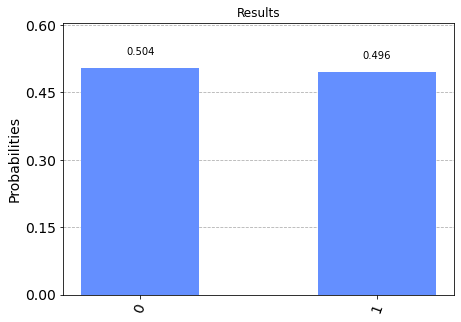

In [27]:
# ploting the counts above as a histogram

from qiskit.visualization import plot_histogram

plot_histogram(counts, title="Results")

In [28]:
p_y_k = counts["1"]/n_runs

p_y_k

0.496

In [29]:
y_pred_k = 1 if p_y_k > 0.5 else 0

y_pred_k

0

In [30]:
y_train.iloc[k]

0

In [31]:
logit.predict_proba(X_train.iloc[k].values.reshape(1, -1))

C:\Users\gueha\anaconda3\envs\quantum\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.65126972, 0.34873028]])

In [32]:
# functions for the circuit construction

def initialize_circuit(Nq, Nc):
    '''
    initializes a circuit with Nq quantum registers and Nc classical registers
    '''
    
    # quantum and classical registers
    qr = QuantumRegister(Nq, "q")
    cr = ClassicalRegister(Nc, "c")

    # quantum circuit
    qc = QuantumCircuit(qr, cr)

    return qc

#########################################################################################
#########################################################################################

def feature_map(qc, X_k):
    '''
    encodes classical data (in the array X) into the quantum circuit initial state.
    each component of the X array is encoded in the respective quantum register.
    the encoding is achieved via a Rx rotation, whose angle is the respective X component
    '''
    
    # data encoding with Rx rotations
    for i, phi_ik in enumerate(X_k):
    
        qc.rx(phi_ik, i)
        
    return qc

#########################################################################################
#########################################################################################

def variational_circuit(qc, theta):
    '''
    implements the variational portion of the quantum cirrcuit.
    the particular architecture will be: CNOTs between the registers;
    followed by parameterized Ry rotations (parameters defined by the argument "theta"); 
    '''
    
    # CNOTs to induce entanglement
    for i in range(N-1):
    
        qc.cnot(i, i+1)
        
    # final CNOT, targeted on the first register
    qc.cnot(N-1, 0)

    # parameterized rotations
    for i in range(N):

        qc.ry(theta[i], i)
        
    return qc
        
#########################################################################################
#########################################################################################


def measurement(qc):
    '''
    measure the first quantum register into the classical register
    '''
    
    qc.measure(0, -1)
    
    return qc

In [33]:
# full function to construct the circuit

def build_circuit(Nq, Nc, X, theta, k, show_circuit=True):
    '''
    construct and return the quantum circuit for the variational quantum classifier
    '''

    qc = initialize_circuit(Nq, Nc)
    
    feature_map(qc, X.iloc[k])
    
    variational_circuit(qc, theta)
    
    measurement(qc)
    
    if show_circuit:
        
        show_figure(qc.draw())
        
    return qc

In [34]:
# functions for the circuit execution

def run_circuit(qc, simulator=True, backend_name = "qasm_simulator", n_runs=1e3, seed_simulator=None):
    '''
    executes the quantum circuit in the specified backend (in the moment, it's just a simulator)
    TODO: allow for actual hardware
    the number of executions can also be specified.
    returns the results of the execution.
    '''
    
    if simulator:
        
        # import provider for simulator and define the simulator backend
        backend = Aer.get_backend(backend_name)
        
    else:
        
        pass
        # # todo: quantum hardware
        # backend = ...
        
    # defining the job and sending it to execute in the defined backend
    # we will run the circuit a n_runs number of times
    job = execute(qc, backend, shots=n_runs, seed_simulator=seed_simulator)
    
    # getting the results of the job execution
    results = job.result()
    
    return results

#########################################################################################
#########################################################################################

def show_figure(fig):
    '''
    auxiliar function to display plot 
    even if it's not the last command of the cell
    from: https://github.com/Qiskit/qiskit-terra/issues/1682
    '''
    
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)

#########################################################################################
#########################################################################################

def final_answer(results, thresh=0.5, n_runs=1e3, visualize_results=False):
    '''
    calculate the probability of the observation belonging to class 1
    i.e., like the logit, calculation of P(y=1|x). 
    the actual class prediction is also calculated. both are returned.
    an optional visualization of the execution results as a histogram is also available
    '''

    # getting the resulting counts (of measurements in the classical register),
    counts = results.get_counts()
    
    if visualize_results:
        # ploting the counts as a histogram
        show_figure(plot_histogram(counts, title="Results"))
        
    # p(y=1 | x) - probability of observation belonging to class 1
    p_y = counts["1"]/n_runs
    
    # actual prediction, according to the specified threshold
    y_pred = 1 if p_y > thresh else 0
    
    return p_y, y_pred

In [35]:
# full vqc function (takes the quantum circuit as input and executes it)

def vqc(qc, simulator=True, backend_name = "qasm_simulator", n_runs=1e3,
        thresh=0.5, visualize_results=False, seed_simulator=None):
    '''
    this function integrates all the functions above in a single structure
    and returns p_y
    the only input is the integer k, used as an index for the chosen observation
    returns the final answer (probability and prediction)
    '''
    
    results = run_circuit(qc, seed_simulator=seed_simulator)

    return final_answer(results, visualize_results=visualize_results)

Running VQC

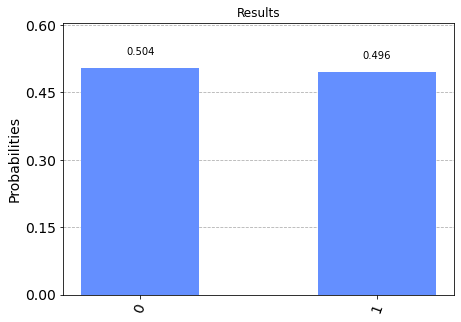

Predicted p(y=1|x) for the 0-th training observation: 0.496
Therefore, this observation is classified as 0


In [36]:
np.random.seed(42)
theta = np.random.uniform(0, 1, N)

qc = build_circuit(N, 1, X_train, theta, k=0, show_circuit=False)

p_y_k, y_pred_k = vqc(qc, seed_simulator=42, visualize_results=True)

print("Predicted p(y=1|x) for the " + str(k) + "-th training observation:", p_y_k)
print("Therefore, this observation is classified as", y_pred_k)

Training the VQC

In [37]:
def loss_SE(p_y_k, y, k):
    '''
    computes the squared error (SE) loss
    '''
    
    return (p_y_k - y.iloc[k])**2

In [38]:
loss_SE(p_y_k, y_train, k)

0.24601599999999998

In [39]:
def gradient(N, X, y, k, p_y_k, theta, delta=5e-3, seed_simulator=None):   
    '''
    computes the directional derivative using the finite difference method
    '''
    
    theta_list = []
    for i in range(len(theta)):

        theta_list.append(theta.copy())
        theta_list[-1][i] = theta_list[-1][i] + delta
    
    del_theta = []
    
    for theta_pd in theta_list:
        
        # below, pd = "plus delta"
        
        qc_pd = build_circuit(N, 1, X, theta_pd, k, show_circuit=False)
        p_y_k_pd, _ = vqc(qc_pd, seed_simulator=seed_simulator)

        loss_theta = loss_SE(p_y_k, y, k)
        loss_theta_pd = loss_SE(p_y_k_pd, y, k)

        derivative = (loss_theta_pd - loss_theta)/delta

        del_theta.append(derivative)
        
    return np.array(del_theta)

#########################################################################################
#########################################################################################

def train_accuracy(y_pred_k, y, k):
    
    return 1 if y_pred_k == y.iloc[k] else 0

#########################################################################################
#########################################################################################
    
def stochastic_gd(N, X, y, theta, lr = 5e-2, num_epochs=50, show_progress=True, seed_simulator=None):
    
    loss_each_epoch = []
    accuracy_each_epoch = []
    
    if show_progress:
        print("Epoch \t Loss \t Training Accuracy")
    
    for n in range(num_epochs):
        
        loss_inter_epoch = []
        accuracy_inter_epoch = []
        
        for k in range(X.shape[0]):
        
            qc = build_circuit(N, 1, X, theta, k, show_circuit=False)

            p_y_k, y_pred_k = vqc(qc, seed_simulator=seed_simulator)
            
            loss_inter_epoch.append(loss_SE(p_y_k, y, k))
            
            accuracy_inter_epoch.append(train_accuracy(y_pred_k, y, k))
            
            theta = theta - lr * gradient(N, X, y, k, p_y_k, theta, seed_simulator=seed_simulator)
    
        loss_each_epoch.append(np.mean(loss_inter_epoch)) 
        accuracy_each_epoch.append(np.mean(accuracy_inter_epoch)) 
        
        if show_progress:
            print(n+1, "\t", round(loss_each_epoch[-1], 3), "\t", round(accuracy_each_epoch[-1], 3))
            
    return loss_each_epoch, accuracy_each_epoch, theta

In [42]:
N = X_train.shape[1]

np.random.seed(42)

theta = np.random.uniform(0, 2*np.pi, N)

# making a copy for later comparison
theta_0 = theta.copy()

num_epochs = 20

training_loss, training_accuracy, theta_final = stochastic_gd(N, X_train, y_train, theta,
                                                              lr = 0.01, num_epochs=num_epochs, 
                                                              seed_simulator=42)

Epoch 	 Loss 	 Training Accuracy
1 	 0.251 	 0.498
2 	 0.25 	 0.502
3 	 0.25 	 0.503
4 	 0.25 	 0.499
5 	 0.251 	 0.495
6 	 0.25 	 0.501
7 	 0.251 	 0.494
8 	 0.251 	 0.495
9 	 0.251 	 0.499
10 	 0.251 	 0.5
11 	 0.251 	 0.5
12 	 0.251 	 0.499
13 	 0.251 	 0.5
14 	 0.251 	 0.499
15 	 0.251 	 0.5
16 	 0.251 	 0.499
17 	 0.251 	 0.5
18 	 0.251 	 0.499
19 	 0.251 	 0.5
20 	 0.251 	 0.499


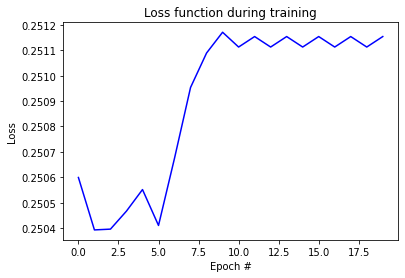

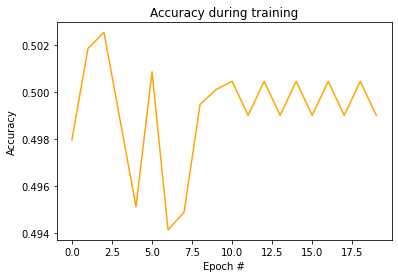

In [43]:
plt.title("Loss function during training")

sns.lineplot(x = range((len(training_loss))), y=training_loss, color="blue")

plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

plt.title("Accuracy during training")

sns.lineplot(x = range((len(training_accuracy))), y=training_accuracy, color="orange")

plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.show()

In [44]:
print("Final variational parameters vector:", theta_final)

print("\nMean training accuracy in the", num_epochs, "epochs:", np.mean(training_accuracy))

Final variational parameters vector: [0.57942497 5.97351416 4.59925358 3.76148219 0.98029403 0.98014248
 0.3649501  5.44234523 3.77691701 4.44895122]

Mean training accuracy in the 20 epochs: 0.4991592971840819


Evaluate the VQC on the test set

In [45]:
y_pred = []

for k in range(X_test.shape[0]):
    
    qc = build_circuit(N, 1, X_test, theta_final, k, show_circuit=False)

    _, y_pred_k = vqc(qc, seed_simulator=42)
                      
    y_pred.append(y_pred_k)

In [46]:
print("Quantum classifier (VQC):\n")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Quantum classifier (VQC):

              precision    recall  f1-score   support

           0       0.80      0.50      0.62      3438
           1       0.20      0.49      0.28       859

    accuracy                           0.50      4297
   macro avg       0.50      0.50      0.45      4297
weighted avg       0.68      0.50      0.55      4297

[[1723 1715]
 [ 434  425]]
